# MSDS Introduction to Deep Learning Final
## Discussion on Data Gathering and Data Provenance
For my final project in this deep learning class, I decided to use the deep learning modelling skills I learned on the pima indian blood pressure dataset. This is a commonly used and widely available dataset and in my research for this project, I learned that it is a good dataset to use for testing various modelling capabilities with regards to computational efficiency. Since the point of this course was to learn how to develop and compare deep learning neural network models, I felt that choosing a dataset that would not be rough on my cpu and would allow for multiple iterations of model development/testing was a valuable choice.
## Deep Learning Problem Identified
The deep learning problem identified with this dataset is a binary classification problem that uses input (Number of times pregnant, Plasma glucose concentration at 2 hours in an oral glucose tolerance test, Diastolic blood pressure (mm Hg), Triceps skin fold thickness (mm), 2-hour serum insulin (mu U/ml), Body mass index (weight in kg/(height in m)^2), Diabetes pedigree function, and Age (years)) to idenify if the patient is at risk of early onset diabetes (a 1 if they are at risk or a 0 if they are not at risk). As discussed further later in this report, I will use binary cross entropy and dense and sequential layers to build a deep learning model that can identify this risk.

In [2]:
# for some reason this needed to installed at the start of each google collab session
# pip install scikeras

In [3]:
## First Import the required packages

import scipy
import numpy
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import pandas as pd
import statsmodels
import sklearn
import tensorflow
import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report



## Exploratory Data Analysis Procedure Discussion
### Inspection Plan
- Check the dimensions of the dataset (number of rows and columns).
- Check for any missing values in the dataset.
- Inspect the data types of each column to ensure they are appropriate for analysis (e.g., numeric, categorical).
- Check for any outliers in the data.

### Visualization Plan
- Plot histograms or boxplots for each input variable to visualize their distributions and identify any outliers.
- Explore the relationship between input variables and the output variable using scatter plots or boxplots.
- Use pair plots or correlation matrices to visualize the pairwise relationships between input variables and identify any correlations.

### Data Cleaning Plan
- Handle missing values by either imputing them (e.g., using mean, median, or mode) or removing rows or columns with missing values.
- Address outliers
- Ensure that input variables are properly scaled or normalized

In [4]:
pima = pd.read_csv('/content/drive/MyDrive/DL Proj Files/pima-indians-diabetes.data.txt',header=None)

pima

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Dimensions of the dataset: (768, 9)
Missing values:
 0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64
Data types:
 0      int64
1      int64
2      int64
3      int64
4      int64
5    float64
6    float64
7      int64
8      int64
dtype: object


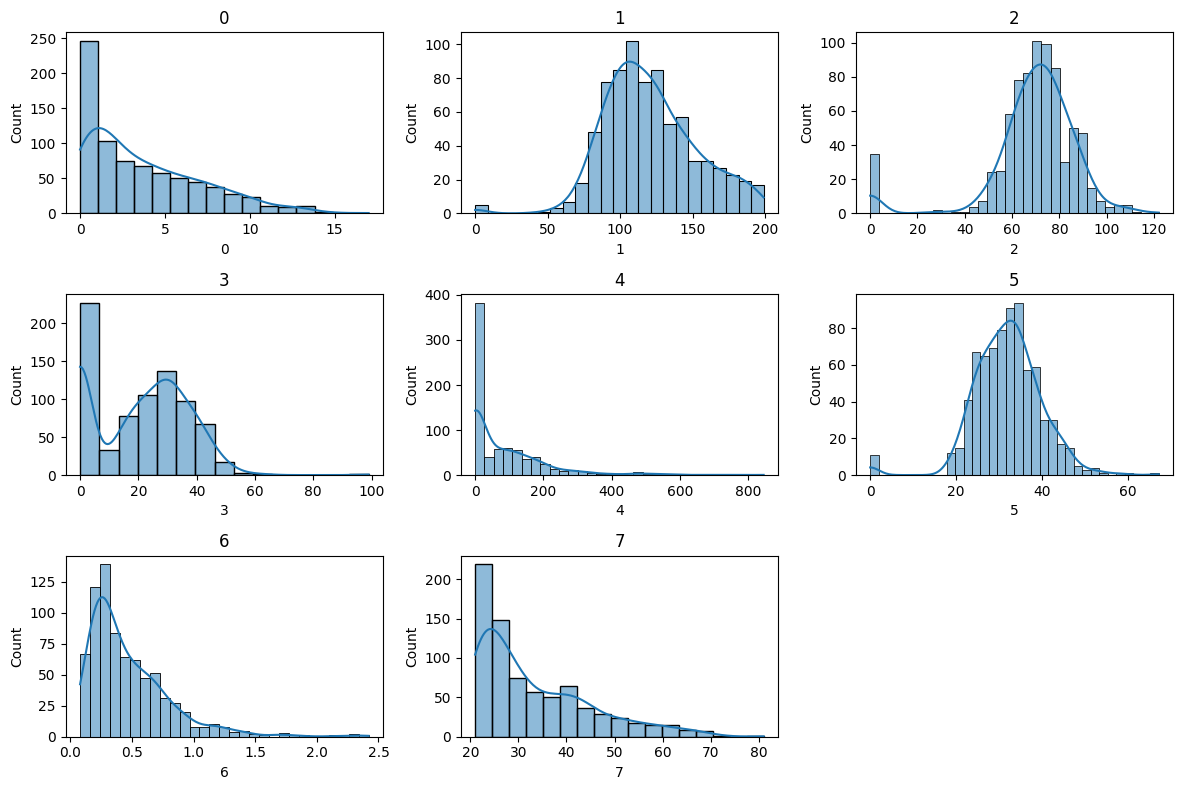

In [6]:
# Inspection
print("Dimensions of the dataset:", pima.shape)
print("Missing values:\n", pima.isnull().sum())
print("Data types:\n", pima.dtypes)

# Visualization
plt.figure(figsize=(12, 8))
for i, column in enumerate(pima.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.histplot(pima[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


# Cleaning
# Handle missing values
pima_cleaned = pima.dropna()
pima = pima_cleaned

# split into input (X) and output (y) variables
X = pima.iloc[:, :8]
y = pima.iloc[:, 8]

## Deep Learning Model Architecture
For the deep learning model I developed, I used the KerasClassifier class since this is a binary classification problem. The model was specified as Sequential (since the model is expected to sequentially take in an input/row of data at a time). The first two layers used in the model are dense layers. From our class, we know that a dense layer is a layer where each node connects from each node from the previous/input layer. Dense layers are good because they are very flexible (which allows for arbitrary transformations from input to output) and are good at capturing complex patterns due to tracking every relationship in that node of the data. The parameter sharing that occurs in dense layers also leads to better generalization (which is good for binary classification) and efficiency in the learning process.

The final part of the model is the compile step. The loss function measures how well the model is performing during training by comparing the predicted output with the actual output. In this case, 'binary_crossentropy' is commonly used for binary classification tasks, where the model predicts either one of two classes (e.g., positive or negative, yes or no). This loss function calculates the difference between the predicted probabilities and the actual labels, penalizing incorrect predictions more heavily.

The optimizer is responsible for adjusting the weights of the neural network during training to minimize the loss function. 'Adam' is a popular optimization algorithm that adapts the learning rate for each parameter based on estimates of the first and second moments of the gradients. It is known for its efficiency and effectiveness in training deep neural networks, as it combines ideas from both momentum and RMSprop optimization techniques.



In [ ]:
def create_model():

	model = Sequential()
	model.add(Dense(12
                 ,input_shape=(8,)
                 ,activation='relu'))
	model.add(Dense(1
                 ,activation='sigmoid'))

	model.compile(loss='binary_crossentropy'
                 ,optimizer='adam'
                 ,metrics=['accuracy'])

	return model

In [7]:

# Function to create model, required for KerasClassifier
def create_model():
	# create model
	model = Sequential()
	model.add(Dense(12, input_shape=(8,), activation='relu'))
	model.add(Dense(1, activation='sigmoid'))
	# Compile model
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)
# create model
model = KerasClassifier(model=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first l

Best: 0.688802 using {'batch_size': 40, 'epochs': 100}
0.572917 (0.034987) with: {'batch_size': 10, 'epochs': 10}
0.636719 (0.035943) with: {'batch_size': 10, 'epochs': 50}
0.682292 (0.021236) with: {'batch_size': 10, 'epochs': 100}
0.649740 (0.042830) with: {'batch_size': 20, 'epochs': 10}
0.638021 (0.019225) with: {'batch_size': 20, 'epochs': 50}
0.677083 (0.015073) with: {'batch_size': 20, 'epochs': 100}
0.527344 (0.076547) with: {'batch_size': 40, 'epochs': 10}
0.654948 (0.029635) with: {'batch_size': 40, 'epochs': 50}
0.688802 (0.004872) with: {'batch_size': 40, 'epochs': 100}
0.580729 (0.044804) with: {'batch_size': 60, 'epochs': 10}
0.583333 (0.018136) with: {'batch_size': 60, 'epochs': 50}
0.664062 (0.009568) with: {'batch_size': 60, 'epochs': 100}
0.566406 (0.032369) with: {'batch_size': 80, 'epochs': 10}
0.605469 (0.033754) with: {'batch_size': 80, 'epochs': 50}
0.622396 (0.075566) with: {'batch_size': 80, 'epochs': 100}
0.540365 (0.135629) with: {'batch_size': 100, 'epochs':

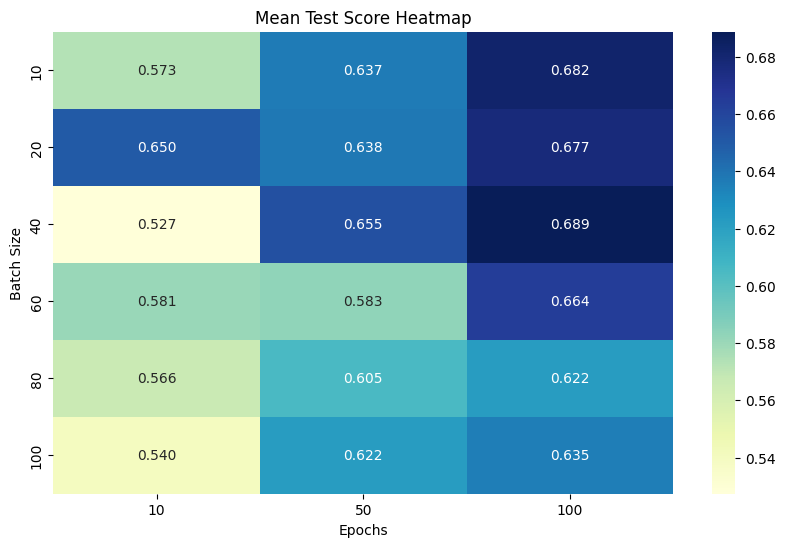

In [8]:
# Extract results
results = pd.DataFrame(grid_result.cv_results_)

# Create a heatmap
heatmap_data = results.pivot(index='param_batch_size', columns='param_epochs', values='mean_test_score')
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", fmt=".3f", cbar=True)
plt.title('Mean Test Score Heatmap')
plt.xlabel('Epochs')
plt.ylabel('Batch Size')
plt.show()



## Hyperparameter Tuning Discussion
The two hyperparameters that are being tuned in my model are batch size and epoch value.

Batch size refers to the number of training examples utilized in one iteration of the training process. Choosing an appropriate batch size is crucial for efficient training. A larger batch size can lead to faster training as more samples are processed in parallel, but it requires more memory. On the other hand, a smaller batch size may lead to slower training but can help the model generalize better as it sees more diverse examples in each epoch. In this case, a batch size of 10 to 60 seem to outpreform the larger values, with the 10 spot doing the best.

An epoch represents one complete pass through the entire dataset during the training process. Epochs are essential for allowing the model to learn from the entire dataset multiple times. Training for multiple epochs enables the model to gradually improve its performance by adjusting its parameters based on the accumulated error from multiple passes through the data. However, training for too many epochs may lead to overfitting, where the model learns to memorize the training data rather than generalize to new, unseen data. In this case, the largest epoch greatly outpreformed the smalled ones, so we will definitely be going with the epoch size of 100.

## Testing grid search parameters
To further finetune my model, I wanted to test the performance of using different grid search parameters using the chosen batch size and epoch. The chosen functions are 'SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', and 'Nadam'.

SGD is a fundamental optimization algorithm used for training neural networks. It updates the model's parameters by computing the gradient of the loss function with respect to each parameter using a small subset (batch) of training data. It then adjusts the parameters in the direction that minimizes the loss.

RMSprop is an adaptive learning rate optimization algorithm that addresses the limitations of SGD. It adapts the learning rate for each parameter based on the average of the square of past gradients. This allows RMSprop to dynamically adjust the learning rate, leading to faster convergence and improved stability.

Adagrad is another adaptive learning rate optimization algorithm that adjusts the learning rate for each parameter based on the sum of the squares of past gradients. It allocates more weight to parameters with infrequent updates and less weight to frequently updated parameters.

Adadelta is an extension of Adagrad that seeks to address its diminishing learning rate issue. Instead of accumulating all past squared gradients, Adadelta restricts the window of accumulated gradients to a fixed-size sliding window. It also introduces an additional parameter to adaptively adjust the learning rates based on recent gradients.

Adam combines the ideas of momentum optimization and RMSprop to provide adaptive learning rates and momentum parameters for each parameter. It computes adaptive learning rates for each parameter based on both the first and second moments of the gradients.

Adamax is a variant of Adam that replaces the second moment of the gradients with the infinity norm (max norm). It simplifies the computation of the second moment and can provide better performance, especially in models with a large number of parameters.

Nadam is an extension of Adam that incorporates the Nesterov accelerated gradient (NAG) method. It combines the advantages of Adam with the momentum term computed using NAG, allowing for faster convergence and improved generalization.

When running the cell below, I found that Adadelta was the clear winner.

In [17]:
batch_size = grid_result.best_params_['batch_size']
epoch = grid_result.best_params_['epochs']

# create model with top batch size and epoch values
model = KerasClassifier(model=create_model, loss="binary_crossentropy", epochs=epoch, batch_size=batch_size, verbose=0)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best: 0.687500 using {'optimizer': 'Adadelta'}
0.675781 (0.011049) with: {'optimizer': 'SGD'}
0.679688 (0.019918) with: {'optimizer': 'RMSprop'}
0.658854 (0.023939) with: {'optimizer': 'Adagrad'}
0.687500 (0.044993) with: {'optimizer': 'Adadelta'}
0.675781 (0.036225) with: {'optimizer': 'Adam'}
0.669271 (0.035849) with: {'optimizer': 'Adamax'}
0.673177 (0.010253) with: {'optimizer': 'Nadam'}


In [18]:
# fit the keras model on the dataset
model.fit(X, y, epochs=epoch, batch_size=batch_size)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


KerasClassifier(
	model=<function create_model at 0x784e17b1cb80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=binary_crossentropy
	metrics=None
	batch_size=40
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=100
	class_weight=None
)

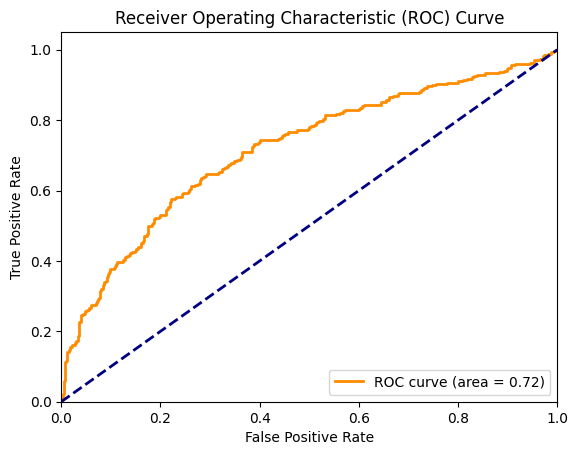

In [57]:
# Get predicted probabilities
y_pred_proba = model.predict_proba(X)
y_pred_proba_positive = y_pred_proba[:, 1]
y_new = y.values
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_true=y_new, y_score=y_pred_proba_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


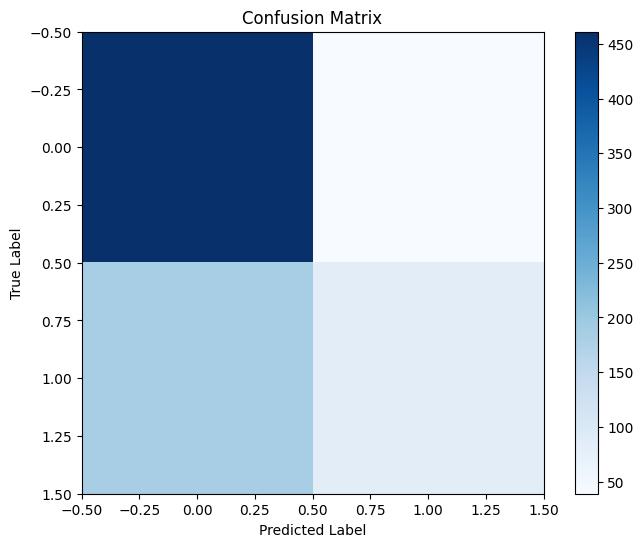

In [60]:
# Get predicted probabilities for each class
y_pred_proba = model.predict_proba(X)

# Convert probabilities to class labels based on a threshold (e.g., 0.5)
y_pred = (y_pred_proba[:, 1] > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [61]:
# Generate classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.92      0.80       500
           1       0.68      0.31      0.43       268

    accuracy                           0.71       768
   macro avg       0.70      0.62      0.62       768
weighted avg       0.70      0.71      0.67       768



## Conclusion
The classification report provides a comprehensive summary of the performance of a classification model across different evaluation metrics, including precision, recall, and F1-score, for each class. In this report, we have two classes: 0 and 1, representing the absence and presence of likelihood to have early onset diabetes.

Precision measures the accuracy of positive predictions, indicating the proportion of correctly predicted positive instances among all instances predicted as positive. A precision of 0.71 for class 0 indicates that 71% of instances predicted as class 0 were correctly classified. Similarly, for class 1, the precision is 0.68, suggesting that 68% of instances predicted as class 1 were correctly classified.

Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify positive instances. A recall of 0.92 for class 0 indicates that 92% of actual class 0 instances were correctly classified as class 0. Conversely, for class 1, the recall is 0.31, indicating that only 31% of actual class 1 instances were correctly classified as class 1.

The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. It takes into account both false positives and false negatives. The weighted average F1-score is 0.67, indicating the overall effectiveness of the model in correctly classifying instances across both classes. The accuracy of the model is 0.71, representing the proportion of correctly classified instances out of the total number of instances. In summary, while the model performs relatively well in correctly classifying instances of class 0, its performance is less satisfactory for class 1, as evidenced by lower recall and F1-score values.